In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as npd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
seed = 42
from sklearn.model_selection import train_test_split
# Import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
sample_submission = pd.read_csv("sample_submission.csv")

In [4]:
sample_submission["Exited"].unique()

array([0.5])

In [5]:
test = pd.merge(test, sample_submission, on='id')

In [6]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [8]:
train["Age"].astype(int)

0         33
1         33
2         40
3         34
4         33
          ..
165029    33
165030    35
165031    31
165032    30
165033    31
Name: Age, Length: 165034, dtype: int32

In [9]:
train.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
train.duplicated().sum()

0

In [11]:
train.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [12]:
nun_numaric=train.select_dtypes(exclude=['number']).columns.tolist()
sayısal_sütunlar = train.select_dtypes(include='number').columns.tolist()

In [13]:
nun_numaric.remove("Surname")

In [14]:
nun_numaric

['Geography', 'Gender']

# Kolon düzenleme

In [15]:
train.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [16]:
train

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [17]:
train["CreditScore"].value_counts()

850    2532
678    2299
684    1718
667    1658
705    1605
       ... 
419       1
386       1
358       1
423       1
373       1
Name: CreditScore, Length: 457, dtype: int64

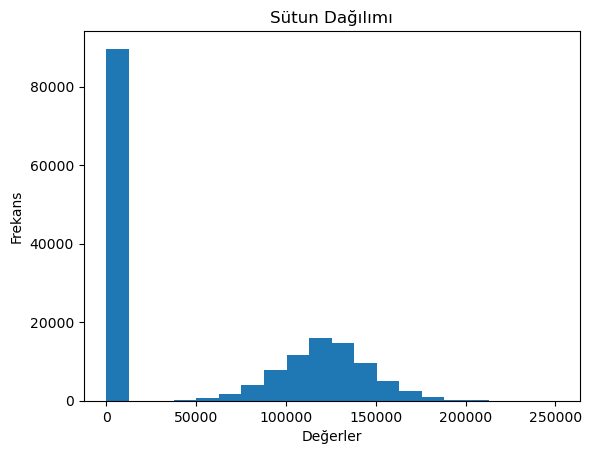

In [18]:
plt.hist(train['Balance'], bins=20)  # sütun_adı, incelemek istediğiniz sütunun adıdır
plt.xlabel('Değerler')
plt.ylabel('Frekans')
plt.title('Sütun Dağılımı')
plt.show()

In [19]:
zero_balance_customers = train[train['Balance'] == 0]

In [20]:
zero_balance_customers

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.0,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.0,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.0,2,1.0,0.0,184866.69,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.0,2,1.0,1.0,15068.83,0
8,8,15691707,Manna,676,France,Male,43.0,4,0.0,2,1.0,0.0,142917.13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165028,165028,15704770,Oluchukwu,630,France,Male,50.0,8,0.0,2,1.0,1.0,5962.50,0
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.0,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.0,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.0,1,1.0,1.0,127429.56,0


In [21]:
train['Zero_Balance_Flag'] = train['Balance'].apply(lambda x: 1 if x == 0 else 0)

In [22]:
train

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Zero_Balance_Flag
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,1
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,1
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,1
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0,1
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0,1
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0,1
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0,0


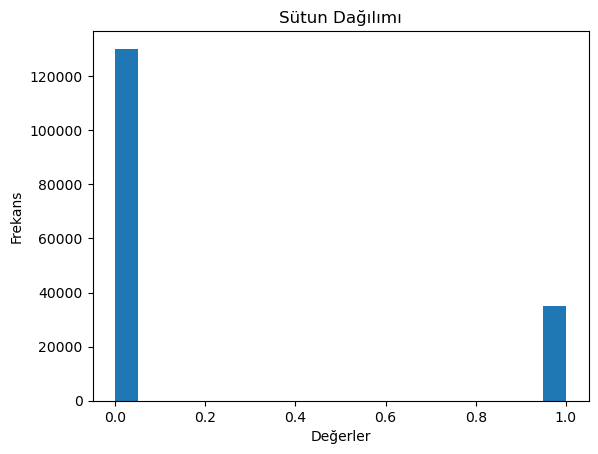

In [23]:
plt.hist(train['Exited'], bins=20)  # sütun_adı, incelemek istediğiniz sütunun adıdır
plt.xlabel('Değerler')
plt.ylabel('Frekans')
plt.title('Sütun Dağılımı')
plt.show()

In [24]:
train["Age"].unique()

array([33.  , 40.  , 34.  , 36.  , 30.  , 37.  , 43.  , 27.  , 71.  ,
       47.  , 25.  , 55.  , 61.  , 35.  , 41.  , 44.  , 26.  , 39.  ,
       31.  , 58.  , 49.  , 32.  , 50.  , 28.  , 45.  , 52.  , 29.  ,
       38.  , 54.  , 56.  , 46.  , 42.  , 64.  , 20.  , 21.  , 23.  ,
       48.  , 59.  , 51.  , 24.  , 53.  , 62.  , 57.  , 22.  , 66.  ,
       67.  , 19.  , 73.  , 60.  , 63.  , 65.  , 75.  , 68.  , 69.  ,
       76.  , 18.  , 70.  , 81.  , 74.  , 72.  , 77.  , 82.  , 79.  ,
       92.  , 80.  , 78.  , 83.  , 36.44, 85.  , 32.34, 84.  ])

In [25]:
yas = train[(train["Age"]==36.44) | (train["Age"]==32.34)].index

In [26]:
train.drop(yas, inplace = True)

In [27]:
train["Age"].unique()

array([33., 40., 34., 36., 30., 37., 43., 27., 71., 47., 25., 55., 61.,
       35., 41., 44., 26., 39., 31., 58., 49., 32., 50., 28., 45., 52.,
       29., 38., 54., 56., 46., 42., 64., 20., 21., 23., 48., 59., 51.,
       24., 53., 62., 57., 22., 66., 67., 19., 73., 60., 63., 65., 75.,
       68., 69., 76., 18., 70., 81., 74., 72., 77., 82., 79., 92., 80.,
       78., 83., 85., 84.])

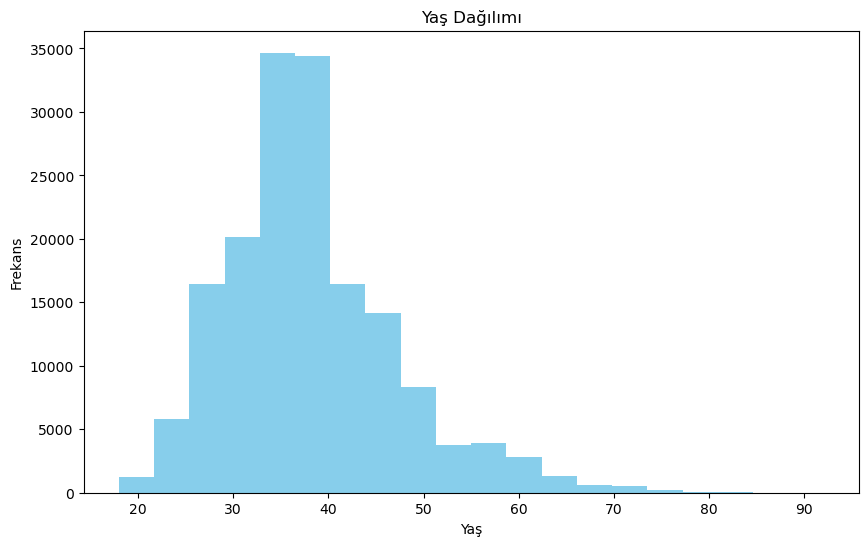

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(train['Age'], bins=20, color='skyblue')  # 20 adet bar kullanarak histogramı çizin
plt.title('Yaş Dağılımı')
plt.xlabel('Yaş')
plt.ylabel('Frekans')
plt.show()

In [29]:
count_over_60 = train[train['Age'] > 60]['Age'].count()
count_over_60 

4016

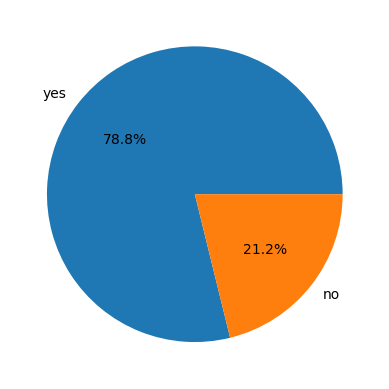

In [30]:
plt.pie(train['Exited'].value_counts(), labels = ("yes","no"), autopct='%1.1f%%')
plt.show()

# Grafikleştirme

In [31]:
crosstab = pd.crosstab(train['Geography'], train['Gender'])

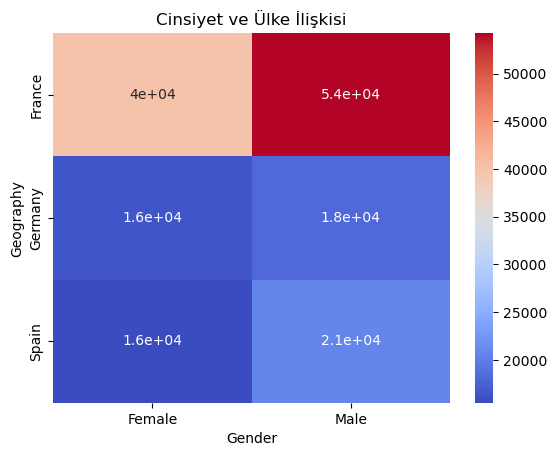

In [32]:
sns.heatmap(crosstab, annot=True, cmap='coolwarm')
plt.title('Cinsiyet ve Ülke İlişkisi')
plt.show()

In [33]:
train["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

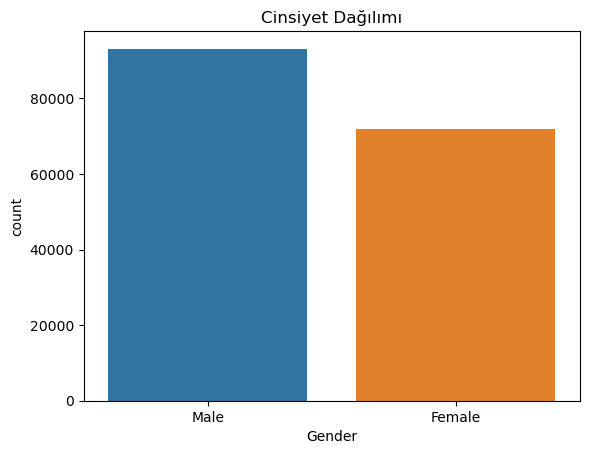

In [34]:
sns.countplot(x='Gender', data=train)
plt.title('Cinsiyet Dağılımı')
plt.show()

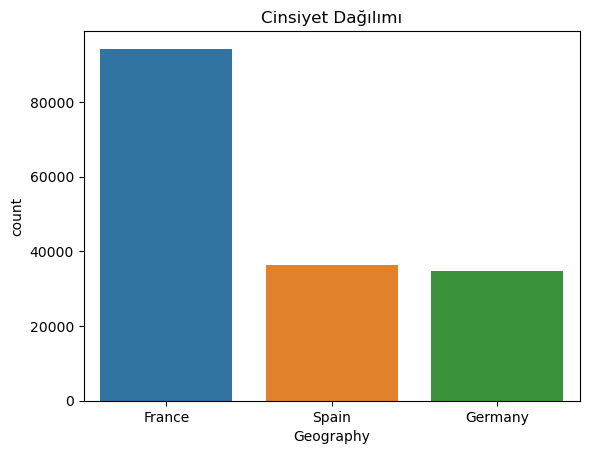

In [35]:
sns.countplot(x='Geography', data=train)
plt.title('Cinsiyet Dağılımı')
plt.show()

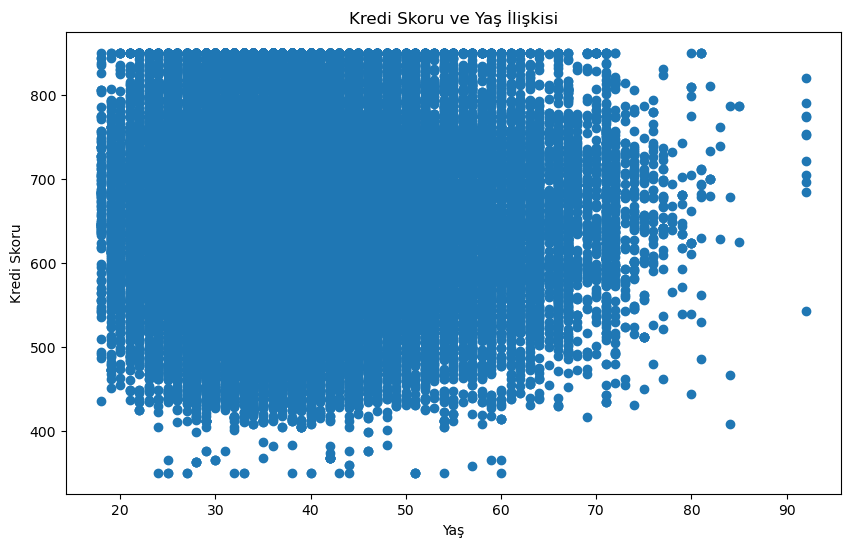

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(train["Age"], train["CreditScore"])
plt.title('Kredi Skoru ve Yaş İlişkisi')
plt.xlabel('Yaş')
plt.ylabel('Kredi Skoru')
plt.show()

In [37]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Zero_Balance_Flag
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,1
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,1
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,1
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,1


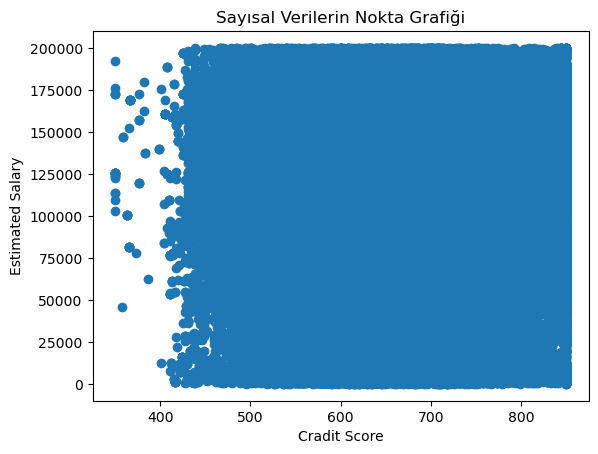

In [38]:
plt.scatter(train['CreditScore'], train['EstimatedSalary'])
plt.xlabel('Cradit Score')
plt.ylabel('Estimated Salary')
plt.title('Sayısal Verilerin Nokta Grafiği')
plt.show()

In [39]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Zero_Balance_Flag
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,1
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,1
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,1
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,1


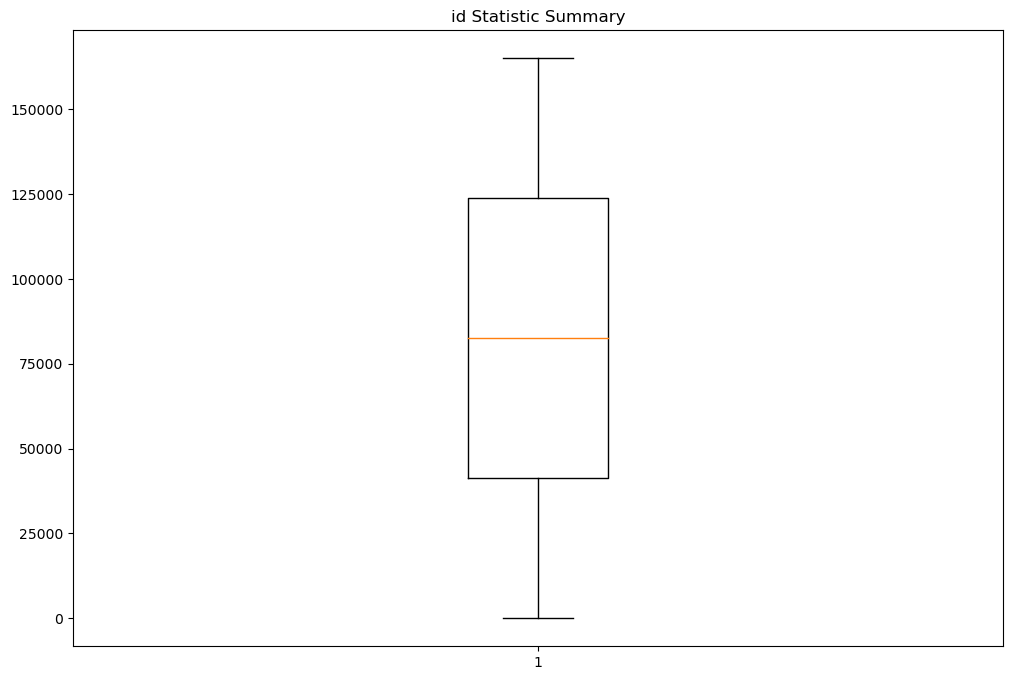

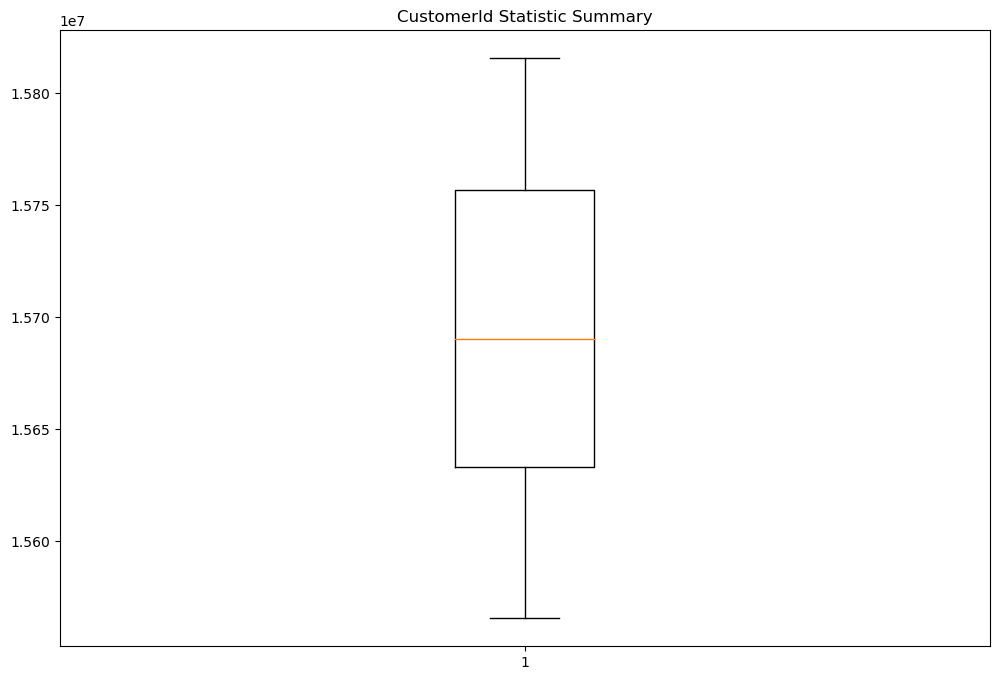

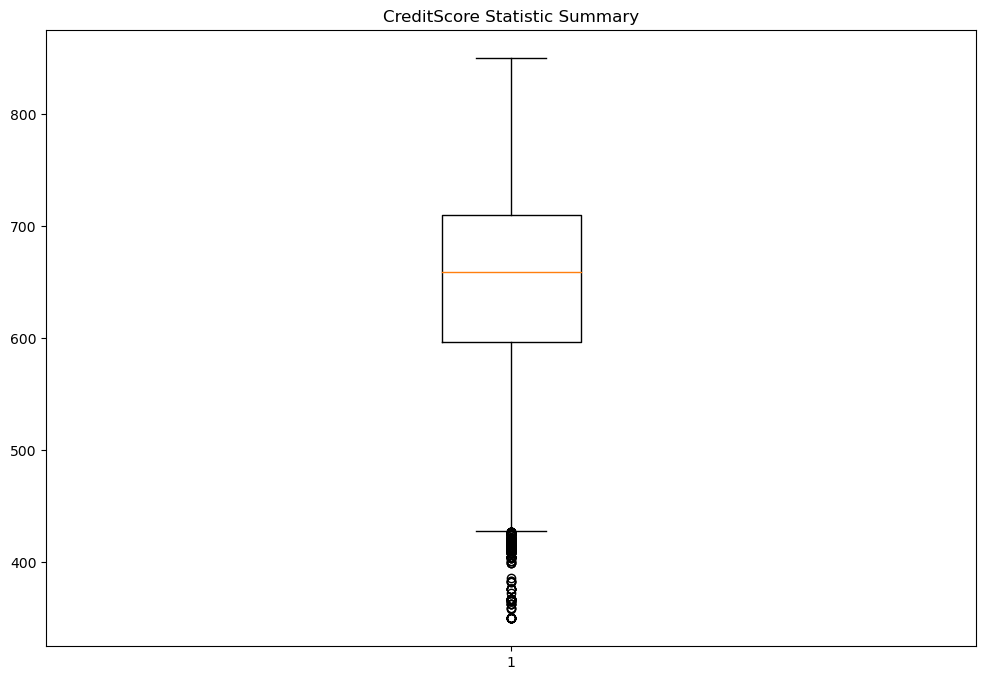

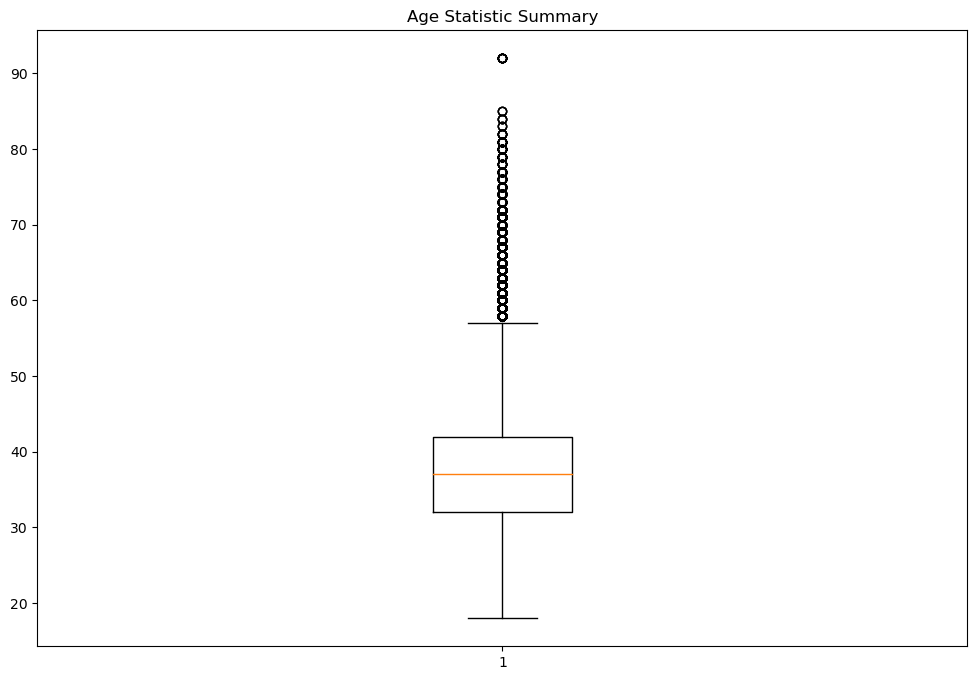

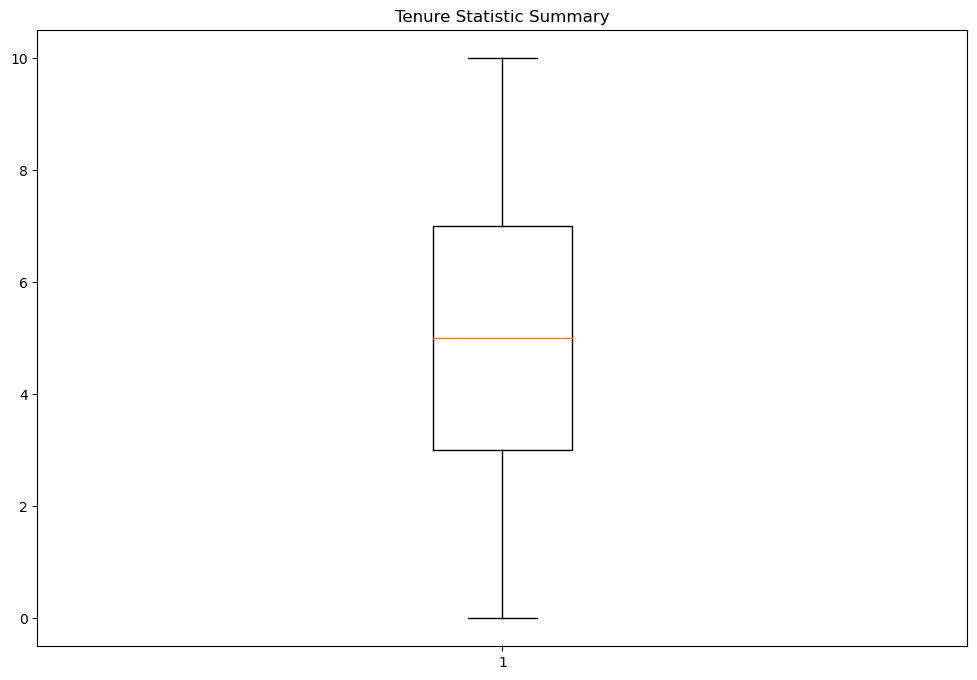

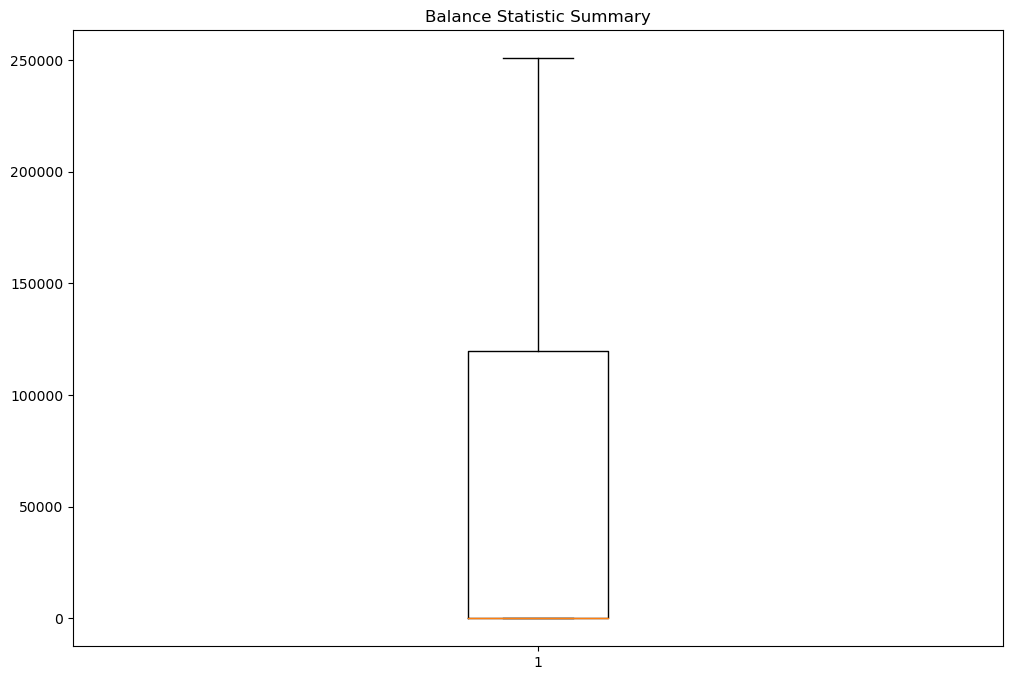

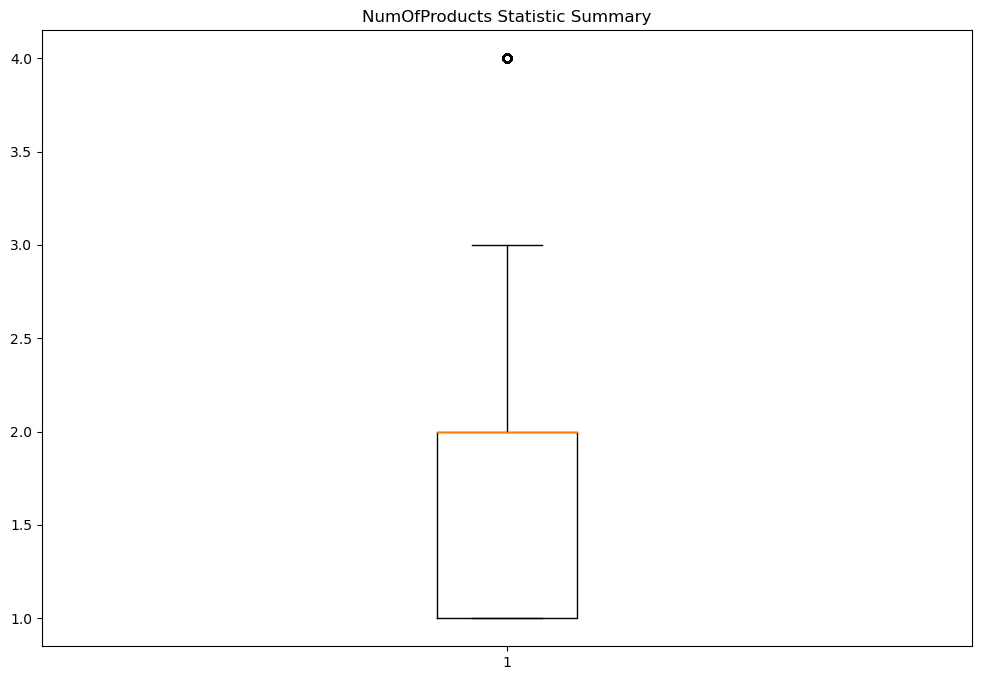

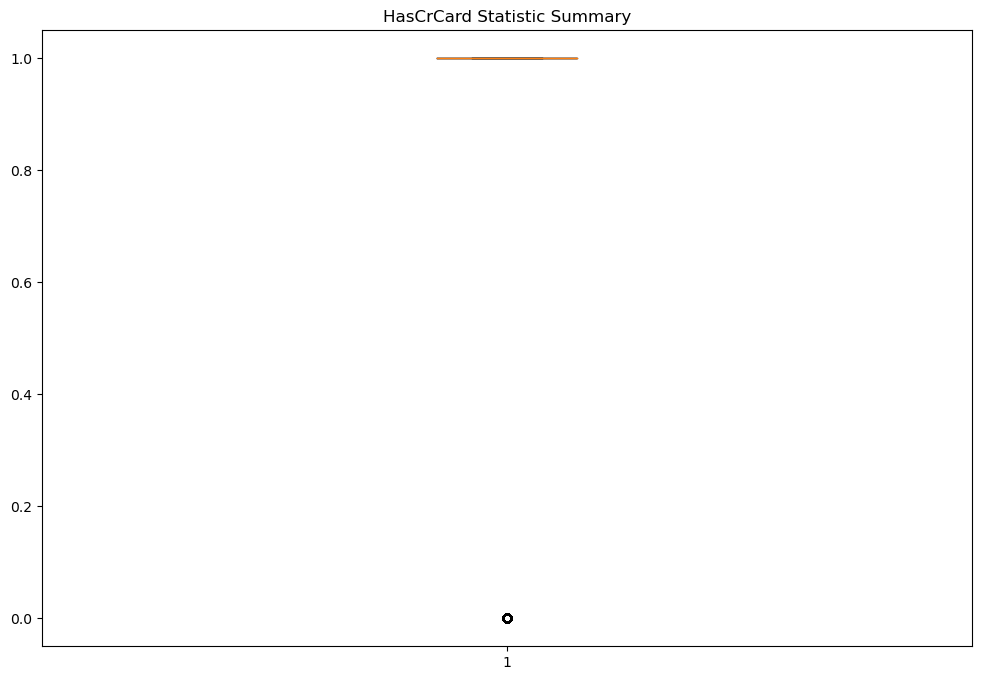

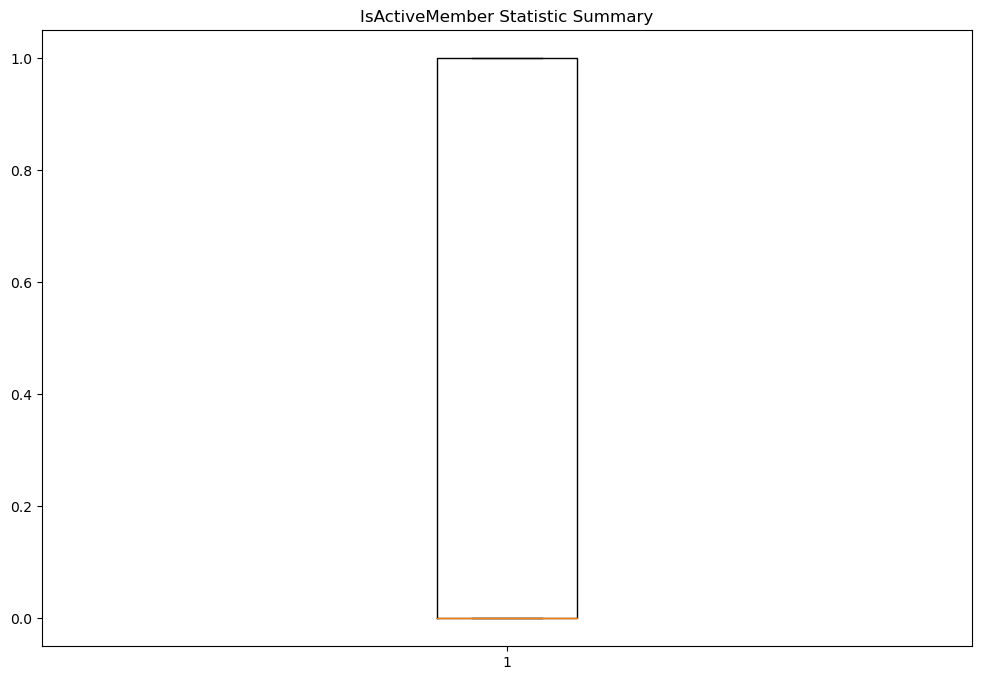

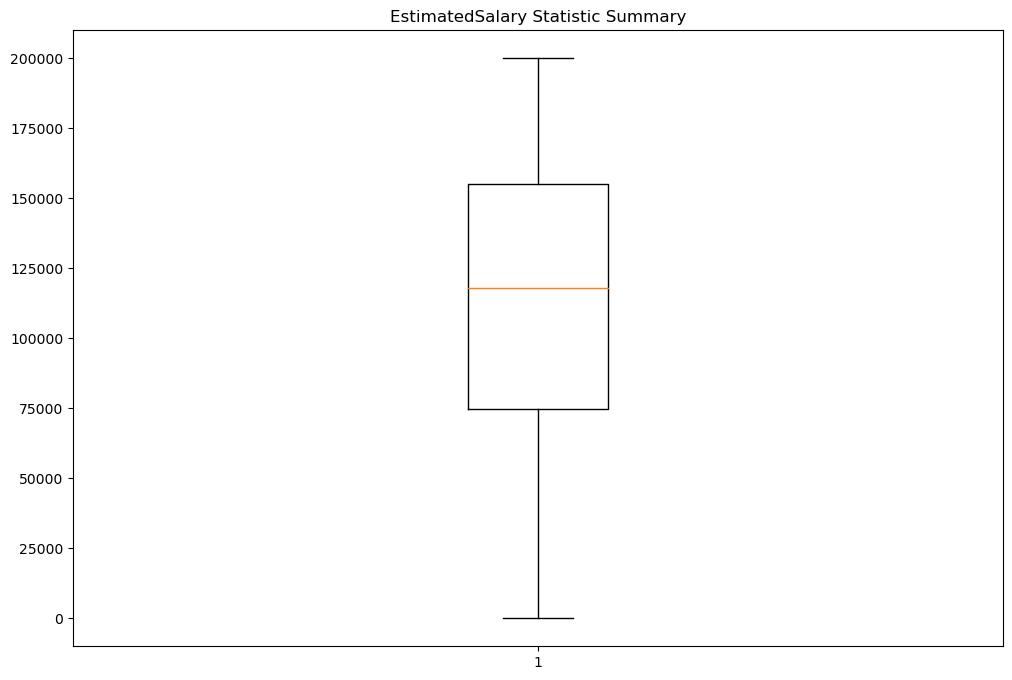

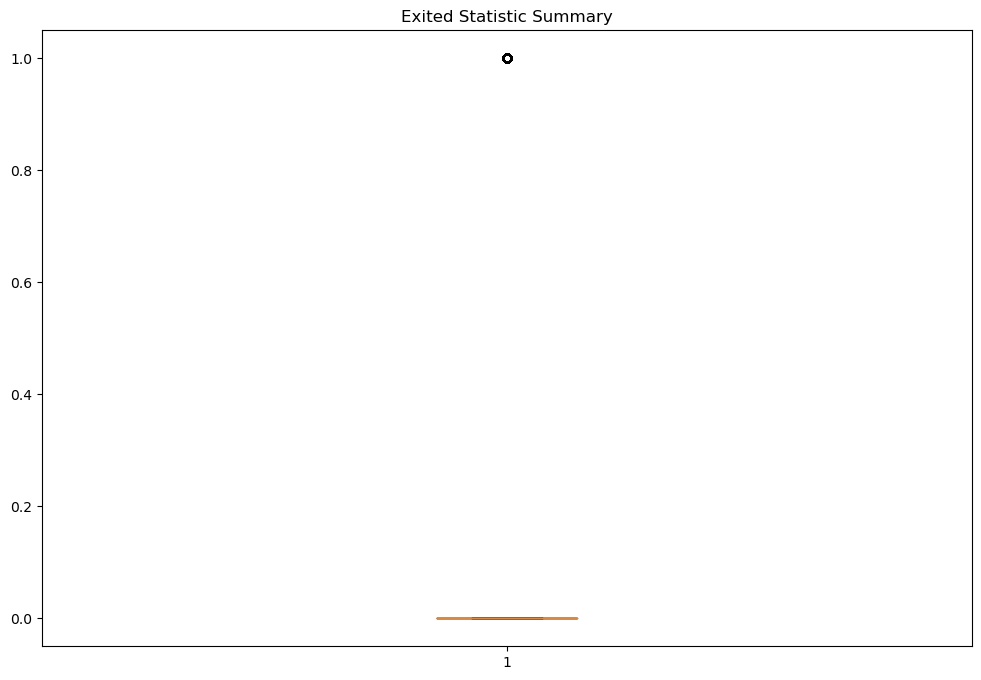

In [40]:
for i in sayısal_sütunlar:
    fig, ax = plt.subplots(figsize=(12,8))
    ax.boxplot(train[i])
    ax.set_title(i+' Statistic Summary')
    plt.show()

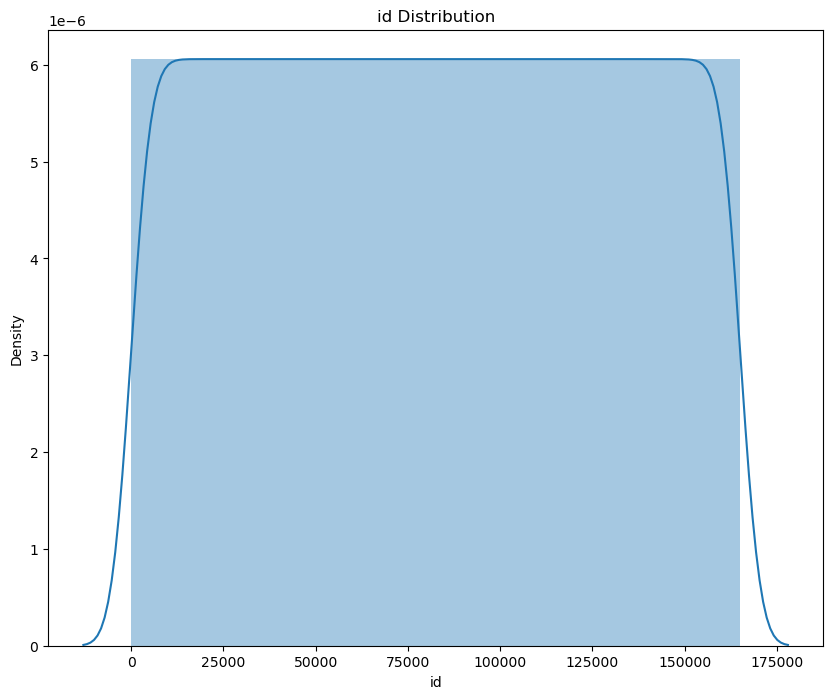

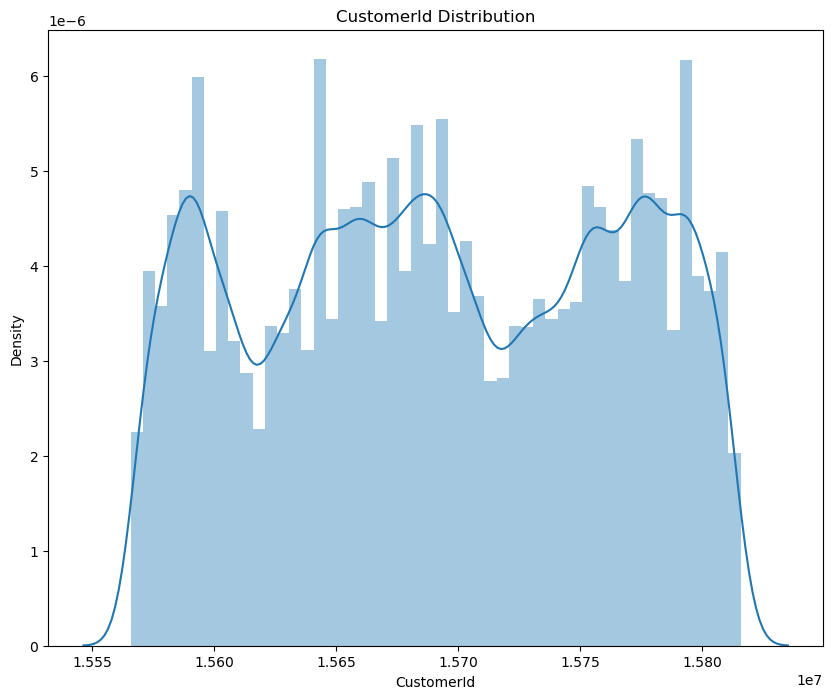

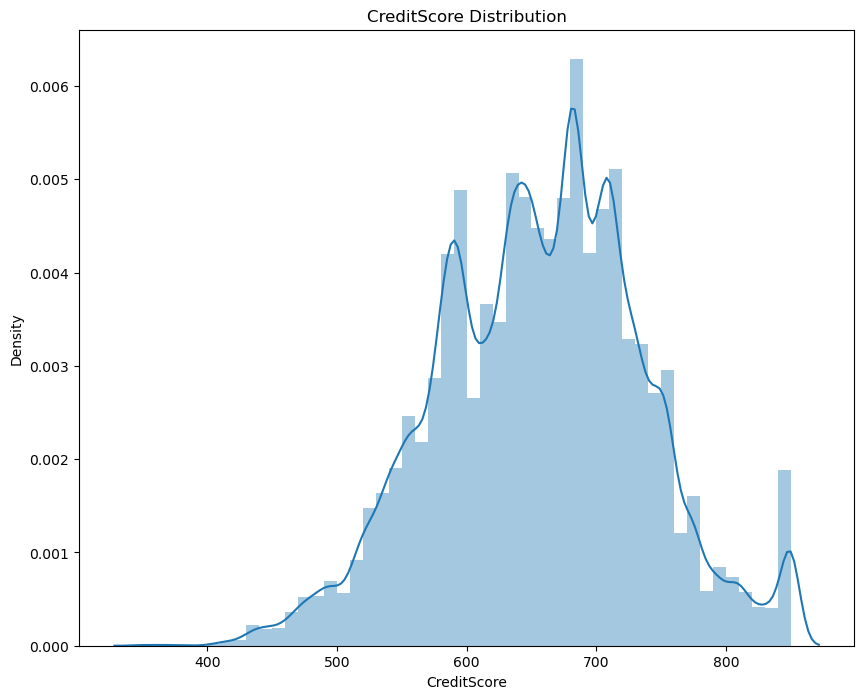

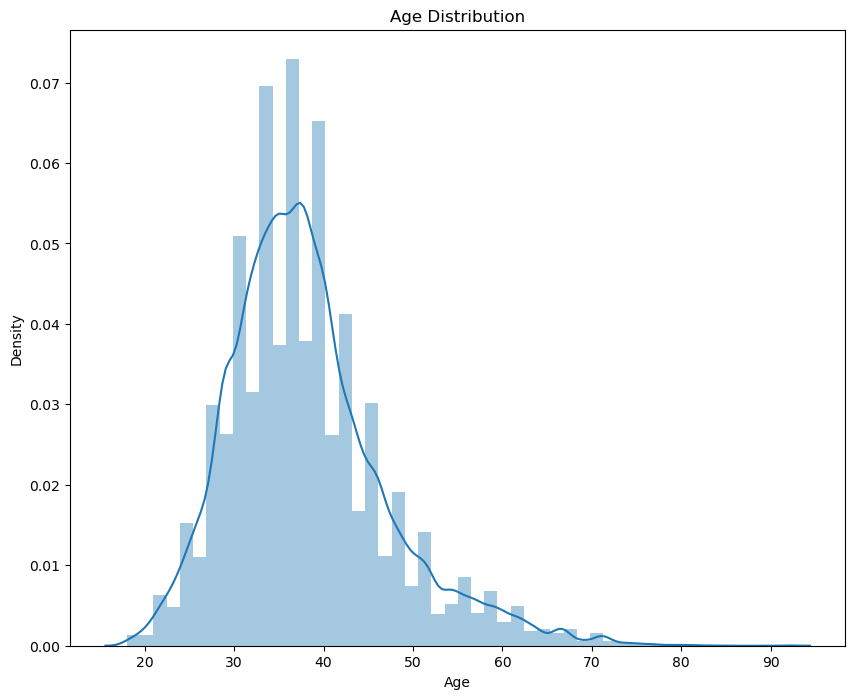

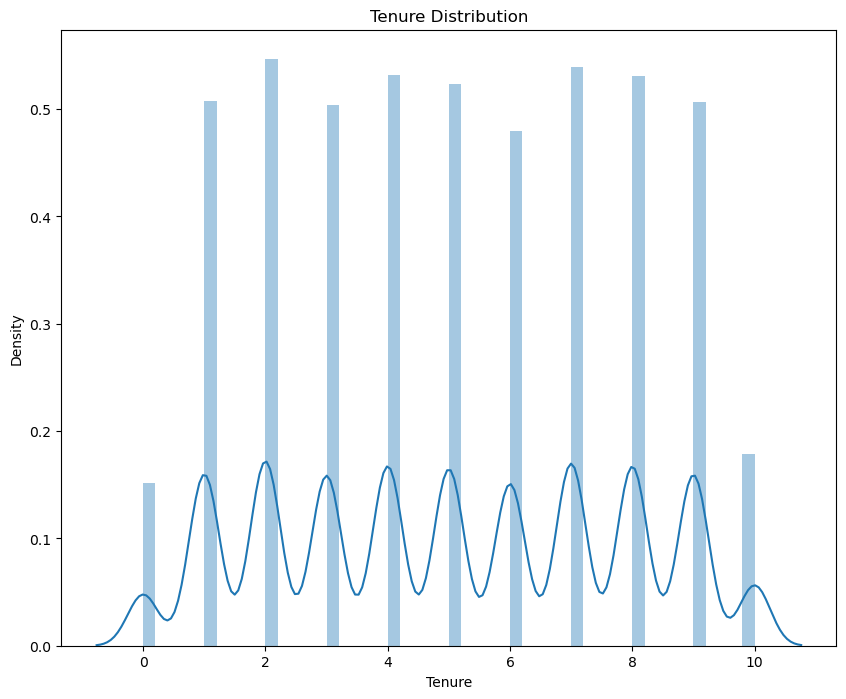

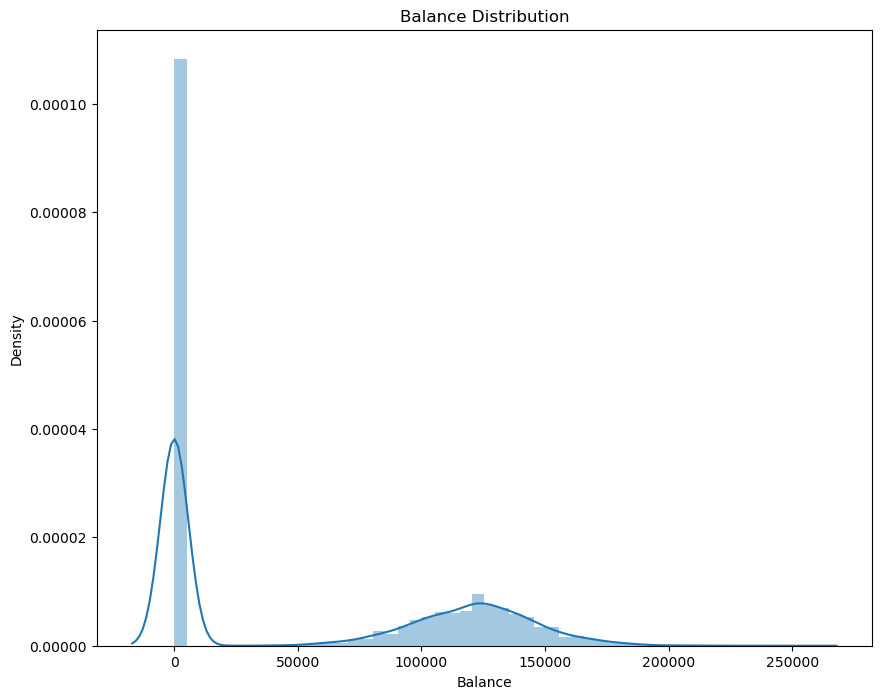

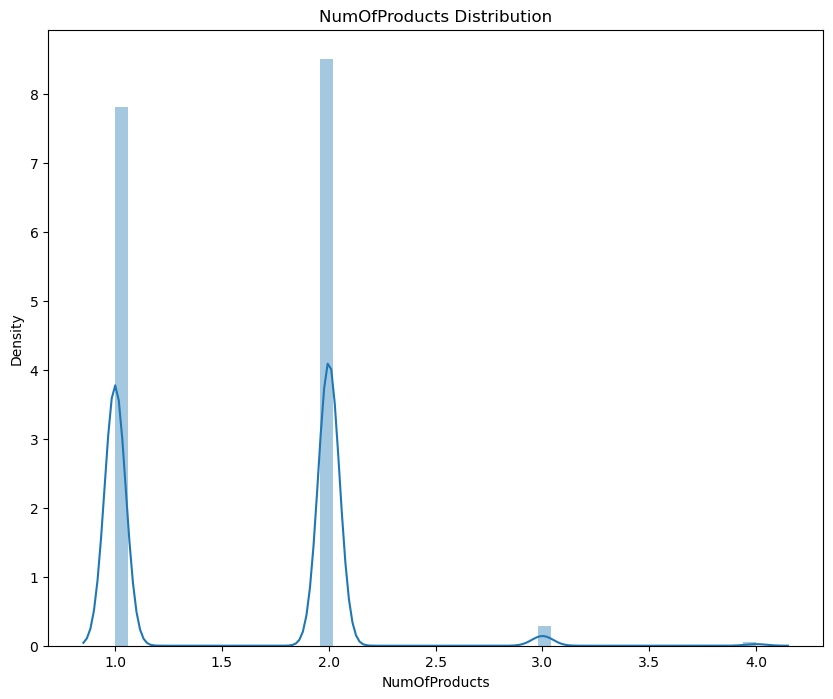

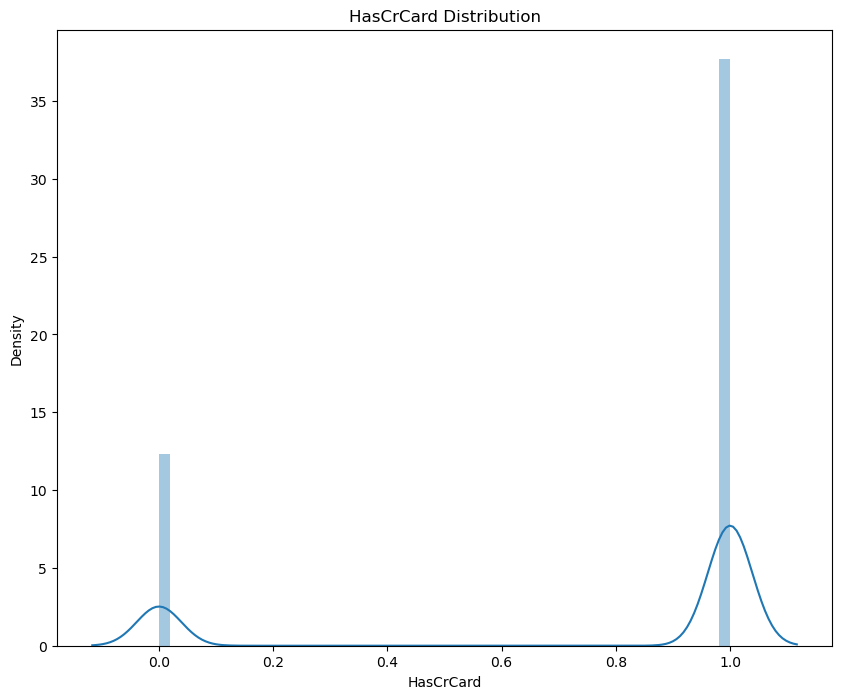

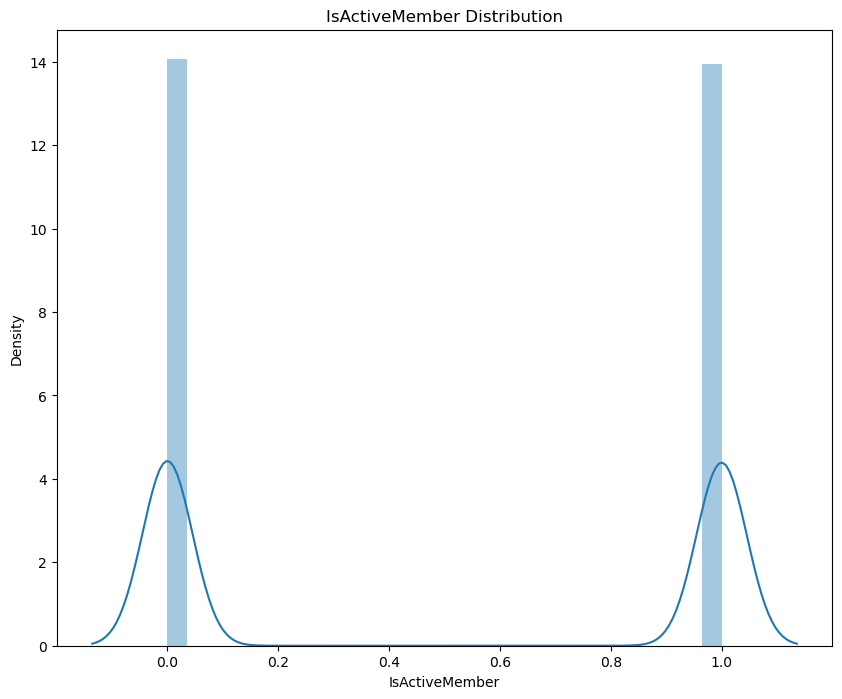

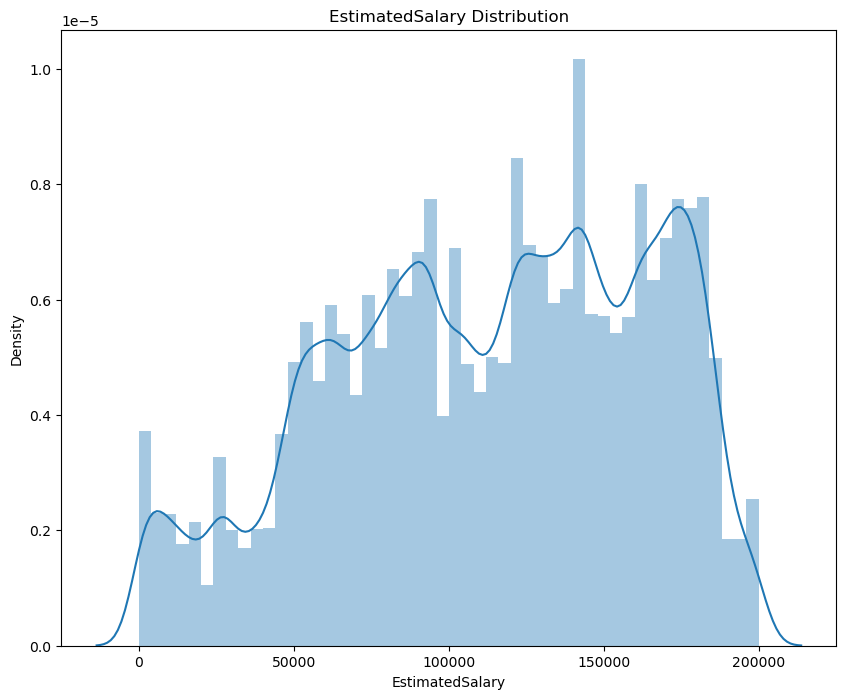

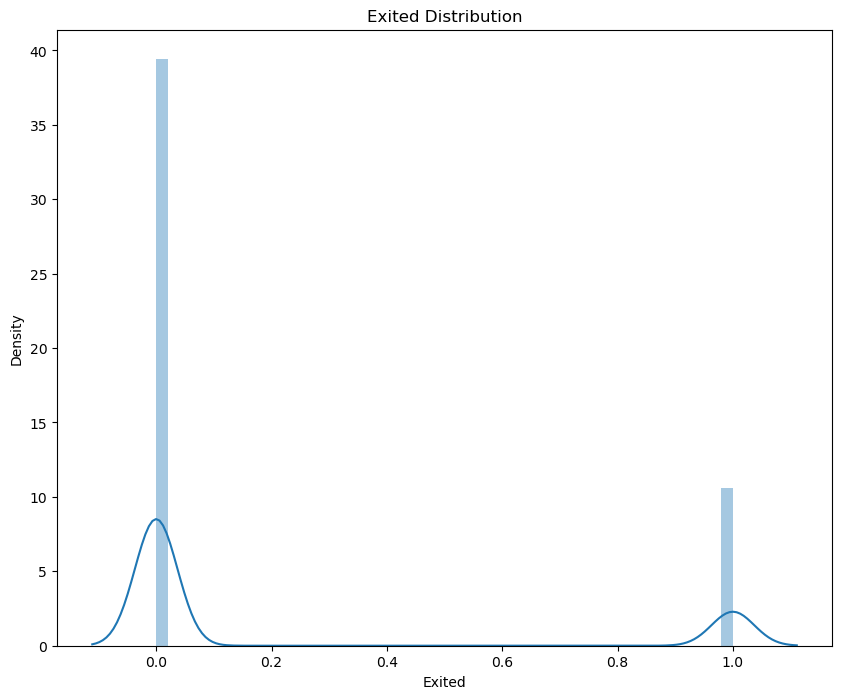

In [41]:
for i in sayısal_sütunlar:
    fig,ax = plt.subplots(figsize=(10,8))
    ax = sns.distplot(train[i])
    ax.set_title(i+' Distribution')
    plt.show()

In [42]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Zero_Balance_Flag
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,1
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,1
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,1
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,1


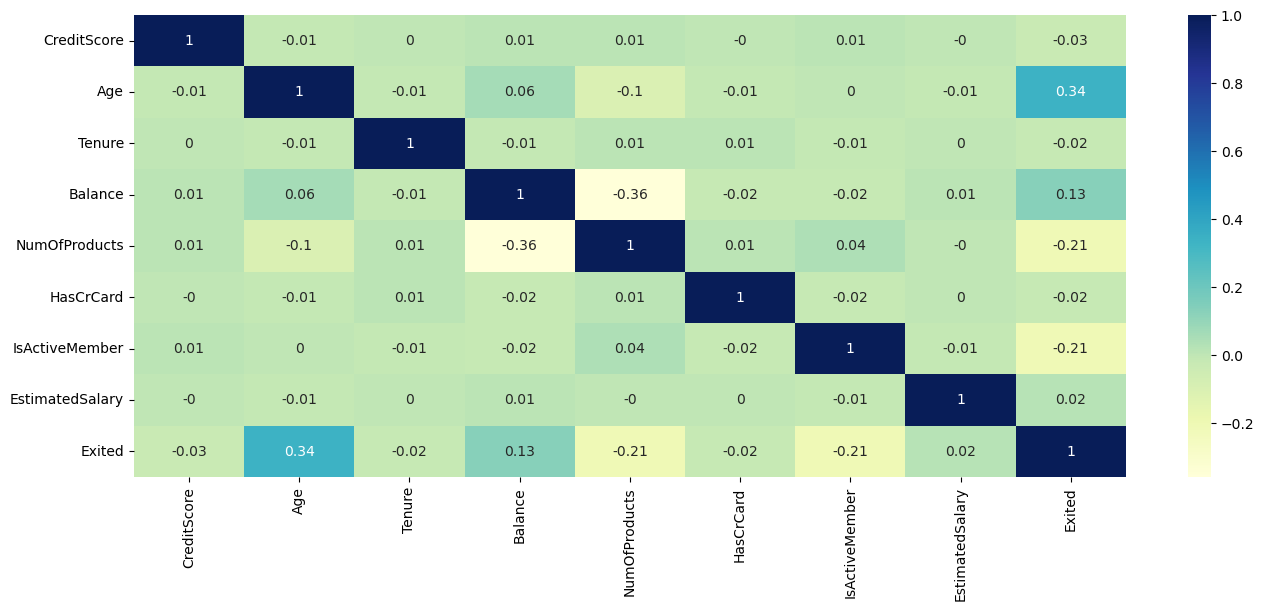

In [43]:
# 2.m.Korelasyon Tablosununum Hazırlanması
plt.figure(figsize=(16, 6))
dataplot = sns.heatmap(train.iloc[:,[3,6,7,8,9,10,11,12,13]].corr().round(2), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

In [44]:
train.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Zero_Balance_Flag'],
      dtype='object')

# Bağımsız değişken seçimi

In [45]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Zero_Balance_Flag
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,1
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,1
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,1
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,1


In [46]:
X = train.iloc[:,3:15]
y = train["Exited"]

In [47]:
X.drop("Exited", axis = 1, inplace = True)

In [48]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Zero_Balance_Flag
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,1
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,1
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,1
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,1
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,1
165030,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,1
165031,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,1
165032,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [49]:
y

0         0
1         0
2         0
3         0
4         0
         ..
165029    0
165030    0
165031    0
165032    0
165033    1
Name: Exited, Length: 165032, dtype: int64

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [51]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Zero_Balance_Flag
81169,466,France,Female,32.0,2,0.00,2,1.0,1.0,2797.27,1
89019,631,France,Male,46.0,6,0.00,2,1.0,0.0,151902.78,1
125799,709,France,Male,35.0,7,0.00,2,1.0,1.0,162812.16,1
133971,632,France,Male,44.0,2,75499.84,1,1.0,0.0,145578.36,0
36459,696,France,Male,35.0,9,112712.14,1,1.0,1.0,155700.15,0
...,...,...,...,...,...,...,...,...,...,...,...
119880,516,France,Female,37.0,0,0.00,2,0.0,0.0,153917.54,1
103695,581,France,Male,33.0,5,0.00,2,1.0,1.0,150475.14,1
131934,727,France,Male,28.0,5,83772.95,1,0.0,1.0,159654.00,0
146869,544,Germany,Female,44.0,3,127841.53,1,0.0,0.0,166677.35,0


In [52]:
y_train

81169     0
89019     1
125799    0
133971    0
36459     0
         ..
119880    0
103695    0
131934    0
146869    1
121959    0
Name: Exited, Length: 110571, dtype: int64

In [53]:
X_test

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Zero_Balance_Flag
33042,798,France,Female,31.0,8,102075.88,1,1.0,0.0,79577.48,0
36330,629,France,Male,26.0,6,0.00,2,1.0,0.0,38190.78,1
50178,679,Germany,Male,50.0,4,116623.31,2,1.0,0.0,160162.42,0
106124,681,Germany,Female,30.0,4,142704.64,2,0.0,1.0,172674.84,0
146750,557,France,Female,31.0,6,106596.29,1,1.0,0.0,91305.77,0
...,...,...,...,...,...,...,...,...,...,...,...
40949,684,France,Male,30.0,2,114035.39,1,0.0,0.0,96885.19,0
2958,694,France,Male,38.0,2,0.00,1,1.0,1.0,86460.77,1
113731,619,Germany,Male,41.0,6,127785.17,2,1.0,1.0,72846.58,0
45034,577,France,Male,41.0,9,0.00,2,0.0,1.0,40257.79,1


In [54]:
#4.e.Kukla Değişken İşlemleri (Dummy Variable)
from sklearn.preprocessing import OneHotEncoder
kukla_değişkenler=["Geography",'Gender']
ohe = OneHotEncoder(sparse=False,handle_unknown='ignore',drop='first')
ohe.fit(X_train[kukla_değişkenler])

def get_ohe(df):
    temp_df = pd.DataFrame(data=ohe.transform(df[kukla_değişkenler]), columns=ohe.get_feature_names_out())
    df.drop(columns=kukla_değişkenler, axis=1, inplace=True)
    df = pd.concat([df.reset_index(drop=True), temp_df], axis=1)
    return df

X_train = get_ohe(X_train)
X_test = get_ohe(X_test)

In [55]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Zero_Balance_Flag,Geography_Germany,Geography_Spain,Gender_Male
0,466,32.0,2,0.00,2,1.0,1.0,2797.27,1,0.0,0.0,0.0
1,631,46.0,6,0.00,2,1.0,0.0,151902.78,1,0.0,0.0,1.0
2,709,35.0,7,0.00,2,1.0,1.0,162812.16,1,0.0,0.0,1.0
3,632,44.0,2,75499.84,1,1.0,0.0,145578.36,0,0.0,0.0,1.0
4,696,35.0,9,112712.14,1,1.0,1.0,155700.15,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
110566,516,37.0,0,0.00,2,0.0,0.0,153917.54,1,0.0,0.0,0.0
110567,581,33.0,5,0.00,2,1.0,1.0,150475.14,1,0.0,0.0,1.0
110568,727,28.0,5,83772.95,1,0.0,1.0,159654.00,0,0.0,0.0,1.0
110569,544,44.0,3,127841.53,1,0.0,0.0,166677.35,0,1.0,0.0,0.0


In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rfc= RandomForestClassifier()
print(cross_val_score(rfc, X_train, y_train, cv = 10, scoring = 'roc_auc'))

[0.8778359  0.8720634  0.87220659 0.86618128 0.87156219 0.87726653
 0.87888096 0.87341429 0.87510694 0.87273705]


In [57]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [58]:
y_pred_rfc_test=rfc.predict(X_test)

y_pred_rfc_train = rfc.predict(X_train)

In [59]:
accuracy = accuracy_score(y_test, y_pred_rfc_test)
print("Accuracy:", accuracy)

Accuracy: 0.8598446594810966


# Grid Search

In [60]:
rs_param_grid = {
    
    "n_estimators": [10,100,200],
    "max_depth": [3,5,10],
    "min_samples_split": [1,3,5],
    "min_samples_leaf": [1,3,5],
    "ccp_alpha": [0, 0.01, 0.1],
    'criterion':['gini', 'entropy'],
    'max_features': ['auto', 'sqrt']
}

In [61]:
grid_search = GridSearchCV(estimator=rfc,param_grid=rs_param_grid, n_jobs=1, cv = 3, scoring = "accuracy")

In [62]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'ccp_alpha': [0, 0.01, 0.1],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [1, 3, 5],
                         'n_estimators': [10, 100, 200]},
             scoring='accuracy')

In [63]:
grid_search.best_estimator_

RandomForestClassifier(ccp_alpha=0, criterion='entropy', max_depth=10,
                       min_samples_leaf=3, min_samples_split=5)

In [64]:
y_pred_gs_test=grid_search.predict(X_test)

y_pred_gs_train = grid_search.predict(X_train)

# Train için sonuçlar

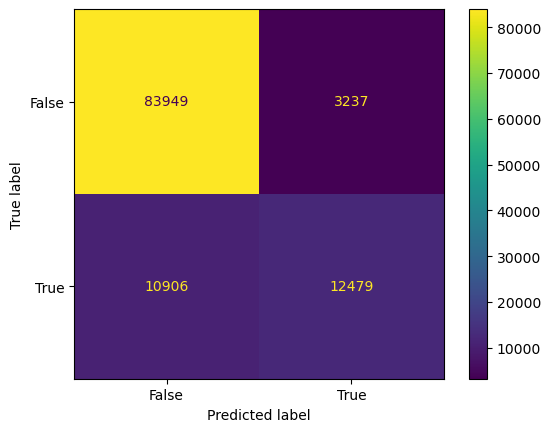

In [65]:
confusion_matrix = metrics.confusion_matrix(y_train, y_pred_gs_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [66]:
training_data_prediction_score = grid_search.score(X_train, y_train)
test_data_prediction_score = grid_search.score(X_test, y_test)
print(training_data_prediction_score,test_data_prediction_score)

0.8720912354957449 0.8638291621527332


In [67]:
accuracy_train = metrics.accuracy_score(y_train, y_pred_gs_train)# Model ne sıklıkla doğru tahmin yapıyor?
accuracy_train

0.8720912354957449

In [68]:
Misclassification_Rate_train = 1-accuracy_train # Model ne sıklıkla yanlış tahmin yapıyor?
Misclassification_Rate_train

0.12790876450425515

In [69]:
Sensitivity_recall_train = metrics.recall_score(y_train, y_pred_gs_train)# Model yüzde kaç sıklıkla pozitif(1) tahmin ediliyor?
Sensitivity_recall_train

0.5336326705152876

In [70]:
Specificity_train = metrics.recall_score(y_train, y_pred_rfc_train, pos_label=0)# Model olumsuz sonuçları (0) tahmin etmede ne kadar iyi?
Specificity_train

0.9999197118803478

In [71]:
Precision_train = metrics.precision_score(y_train, y_pred_gs_train)# Pozitif tahminler (1), ne sıklıkla doğrudur?
Precision_train

0.7940315601934335

In [72]:
F1_score_train = metrics.f1_score(y_train, y_pred_gs_train)#F-score is the "harmonic mean" of precision and sensitivity.
F1_score_train

0.6382956957622569

# Test için sonuçlar

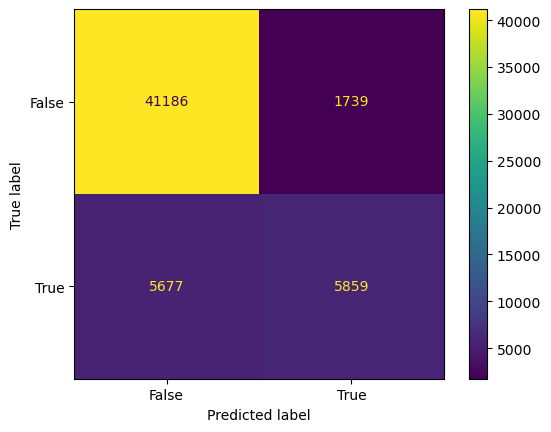

In [73]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_gs_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [74]:
accuracy_test = metrics.accuracy_score(y_test, y_pred_gs_test)# Model ne sıklıkla doğru tahmin yapıyor?
accuracy_test

0.8638291621527332

In [75]:
Misclassification_Rate_test = 1-accuracy_test # Model ne sıklıkla yanlış tahmin yapıyor?
Misclassification_Rate_test

0.1361708378472668

In [76]:
Sensitivity_recall_test = metrics.recall_score(y_test, y_pred_gs_test)# Model yüzde kaç sıklıkla pozitif(1) tahmin ediliyor?
Sensitivity_recall_test

0.5078883495145631

In [77]:
Specificity_test = metrics.recall_score(y_test, y_pred_gs_test, pos_label=0)# Model olumsuz sonuçları (0) tahmin etmede ne kadar iyi?
Specificity_test

0.9594874781595807

In [78]:
Precision_test = metrics.precision_score(y_test, y_pred_gs_test)# Pozitif tahminler (1), ne sıklıkla doğrudur?
Precision_test

0.7711239799947355

In [79]:
F1_score_test = metrics.f1_score(y_test, y_pred_gs_test)#F-score is the "harmonic mean" of precision and sensitivity.
F1_score_test

0.61241768579492

In [80]:
test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75,0.5
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27,0.5
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09,0.5
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57,0.5
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00,0.5


In [84]:
deneme = test.iloc[:,3:13]
deneme['Zero_Balance_Flag'] = deneme['Balance'].apply(lambda x: 1 if x == 0 else 0)

In [85]:
#4.e.Kukla Değişken İşlemleri (Dummy Variable)
from sklearn.preprocessing import OneHotEncoder
kukla_değişkenler=["Geography",'Gender']
ohe = OneHotEncoder(sparse=False,handle_unknown='ignore',drop='first')
ohe.fit(deneme[kukla_değişkenler])

def get_ohe(df):
    temp_df = pd.DataFrame(data=ohe.transform(df[kukla_değişkenler]), columns=ohe.get_feature_names_out())
    df.drop(columns=kukla_değişkenler, axis=1, inplace=True)
    df = pd.concat([df.reset_index(drop=True), temp_df], axis=1)
    return df
deneme = get_ohe(deneme)

In [86]:
grid_search.predict(deneme)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

# Cross Val

In [87]:
grid_search.best_estimator_

RandomForestClassifier(ccp_alpha=0, criterion='entropy', max_depth=10,
                       min_samples_leaf=3, min_samples_split=5)

In [88]:
rfc_best= RandomForestClassifier(ccp_alpha=0, criterion='entropy', max_depth=10,min_samples_split=5, min_samples_leaf=3)
print(cross_val_score(rfc_best, X_train, y_train, cv = 5, scoring = 'roc_auc'))

[0.88989426 0.88497629 0.88891189 0.88698399 0.88874828]


# Deep Learing

In [90]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.layers import Dropout,Dense
from scikeras.wrappers import KerasClassifier, KerasRegressor
from tensorflow.keras.layers import Activation
from sklearn.model_selection import KFold

In [91]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Zero_Balance_Flag,Geography_Germany,Geography_Spain,Gender_Male
0,466,32.0,2,0.00,2,1.0,1.0,2797.27,1,0.0,0.0,0.0
1,631,46.0,6,0.00,2,1.0,0.0,151902.78,1,0.0,0.0,1.0
2,709,35.0,7,0.00,2,1.0,1.0,162812.16,1,0.0,0.0,1.0
3,632,44.0,2,75499.84,1,1.0,0.0,145578.36,0,0.0,0.0,1.0
4,696,35.0,9,112712.14,1,1.0,1.0,155700.15,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
110566,516,37.0,0,0.00,2,0.0,0.0,153917.54,1,0.0,0.0,0.0
110567,581,33.0,5,0.00,2,1.0,1.0,150475.14,1,0.0,0.0,1.0
110568,727,28.0,5,83772.95,1,0.0,1.0,159654.00,0,0.0,0.0,1.0
110569,544,44.0,3,127841.53,1,0.0,0.0,166677.35,0,1.0,0.0,0.0


In [92]:
# Create a new sequential model
model= Sequential()
# Add and input and dense layer
model.add(Dense(32,input_shape=(12,),activation='sigmoid'))
# Add a final 1 neuron layermodel.
model.add(Dense(1,activation='relu'))

In [93]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                416       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


In [94]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [95]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
3456/3456 [==============================] - 4s 1ms/step - loss: 1.0874 - accuracy: 0.7706
Epoch 2/5
3456/3456 [==============================] - 4s 1ms/step - loss: 0.5270 - accuracy: 0.7881
Epoch 3/5
3456/3456 [==============================] - 4s 1ms/step - loss: 0.5223 - accuracy: 0.7875
Epoch 4/5
3456/3456 [==============================] - 4s 1ms/step - loss: 0.5210 - accuracy: 0.7884
Epoch 5/5
3456/3456 [==============================] - 4s 1ms/step - loss: 0.5160 - accuracy: 0.7885


In [96]:
y_train_preds = model.predict(X_train)
y_test_preds = model.predict(X_test)

1702/1702 [==============================] - 1s 727us/step


In [97]:
accuracy_train=model.evaluate(X_train, y_train)
accuracy_test=model.evaluate(X_test, y_test)

1702/1702 [==============================] - 1s 834us/step - loss: 0.5167 - accuracy: 0.7882


In [98]:
print('Train Accuracy:',accuracy_train)
print('Test Accuracy:',accuracy_test)

Train Accuracy: [0.5133363008499146, 0.7885069251060486]
Test Accuracy: [0.516746461391449, 0.7881786823272705]


In [99]:
history=model.fit(X_train,y_train,epochs=5,batch_size=32,verbose=0,validation_data=(X_test,y_test))

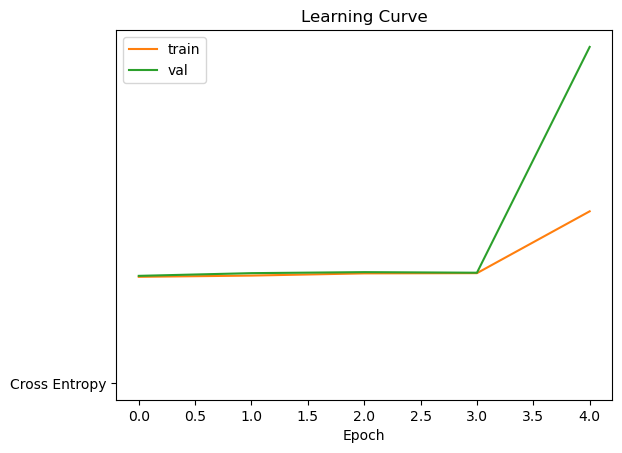

In [100]:
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.plot('Cross Entropy')
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.legend()
plt.show()

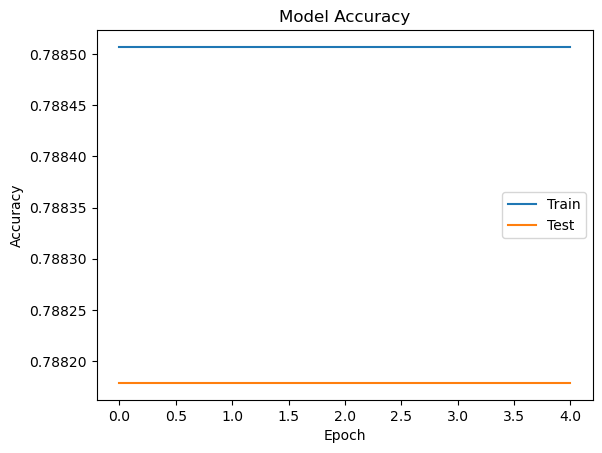

In [101]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])  
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'])
plt.show()

In [114]:
# Create a new sequential model
model_0= Sequential()
# Add and input and dense layer
model_0.add(Dense(16,kernel_initializer='he_normal',input_shape=(12,),activation='sigmoid'))
# 1.katman
model_0.add(Dense(8,activation='sigmoid', kernel_initializer='he_normal'))
# 2.katman
model_0.add(Dense(4,activation='sigmoid', kernel_initializer='he_normal'))
model_0.add(Dropout(0.5))
model_0.add(BatchNormalization())
# 3.katman
# Add a final 1 neuron layermodel.
model_0.add(Dense(1,activation='relu'))

In [115]:
model_0.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [116]:
model_0.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 16)                208       
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 dense_9 (Dense)             (None, 4)                 36        
                                                                 
 dropout_4 (Dropout)         (None, 4)                 0         
                                                                 
 batch_normalization_4 (Batc  (None, 4)                16        
 hNormalization)                                                 
                                                                 
 dense_10 (Dense)            (None, 1)                 5         
                                                      

In [117]:
early_stopping=EarlyStopping(monitor='val_loss',patience=5)

In [118]:
model_save=ModelCheckpoint('best_model.hdf5',save_best_only=True,verbose=1,mode='max')

In [119]:
history_model_0=model_0.fit(X_train,y_train,epochs=50,batch_size=32,verbose=0,validation_data=(X_test,y_test),callbacks=[early_stopping,model_save])


Epoch 1: val_loss improved from -inf to 3.26734, saving model to best_model.hdf5

Epoch 2: val_loss did not improve from 3.26734

Epoch 3: val_loss did not improve from 3.26734

Epoch 4: val_loss did not improve from 3.26734

Epoch 5: val_loss did not improve from 3.26734

Epoch 6: val_loss did not improve from 3.26734

Epoch 7: val_loss did not improve from 3.26734

Epoch 8: val_loss did not improve from 3.26734

Epoch 9: val_loss did not improve from 3.26734

Epoch 10: val_loss did not improve from 3.26734

Epoch 11: val_loss did not improve from 3.26734

Epoch 12: val_loss did not improve from 3.26734

Epoch 13: val_loss did not improve from 3.26734

Epoch 14: val_loss did not improve from 3.26734

Epoch 15: val_loss did not improve from 3.26734

Epoch 16: val_loss did not improve from 3.26734

Epoch 17: val_loss did not improve from 3.26734

Epoch 18: val_loss did not improve from 3.26734

Epoch 19: val_loss did not improve from 3.26734

Epoch 20: val_loss did not improve from 3.2

In [120]:
y_train_preds = model_0.predict(X_train)
y_test_preds = model_0.predict(X_test)

1702/1702 [==============================] - 1s 788us/step


In [121]:
accuracy_train_model_0=model_0.evaluate(X_train, y_train)
accuracy_test_model_0=model_0.evaluate(X_test, y_test)

1702/1702 [==============================] - 2s 925us/step - loss: 0.5092 - accuracy: 0.7882


In [122]:
print('Train Accuracy:',accuracy_train_model_0)

Train Accuracy: [0.5086212158203125, 0.7885069251060486]


In [123]:
print('Train Accuracy:',accuracy_test_model_0)

Train Accuracy: [0.5092096924781799, 0.7881786823272705]


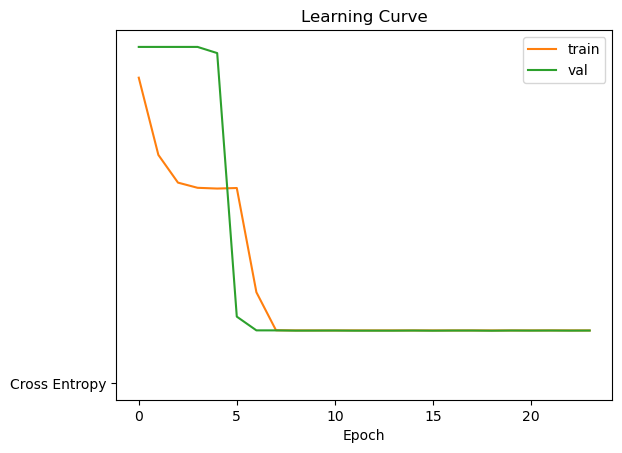

In [124]:
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.plot('Cross Entropy')
plt.plot(history_model_0.history['loss'],label='train')
plt.plot(history_model_0.history['val_loss'],label='val')
plt.legend()
plt.show()

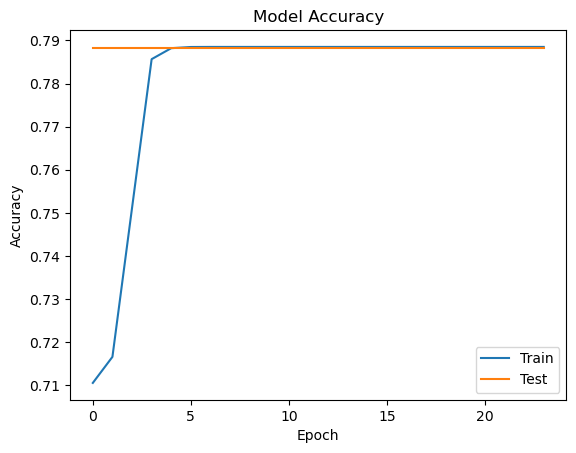

In [125]:
plt.figure()
plt.plot(history_model_0.history['accuracy'])
plt.plot(history_model_0.history['val_accuracy'])  
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'])
plt.show()